## Task 1

**Relationship between inflation and household debt in Sweden using historical data**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [44]:
# Load the xlsx file
file_path = 'NewData.xlsx'
data = pd.read_excel(file_path, sheet_name='Data')
data.head()

,year,rgd,growth,pop,school,cpi,dep,crisis,debthhr
0,1980-12-31,22416,1.354413,8293.723,9.71,13.703583,55.966022,0,0.525129
1,1981-12-31,22331,-0.379988,8310.473,9.71,12.117676,55.740724,0,0.531811
2,1982-12-31,22539,0.932198,8320.485,9.71,8.570579,55.454516,0,0.547187
3,1983-12-31,22756,0.963666,8325.260,9.71,8.873066,55.159177,0,0.533010
4,1984-12-31,23576,3.603165,8329.028,9.71,8.061879,54.920212,0,0.527742


We have successfully loaded the data from the provided Excel file. The dataset contains yearly observations from 1980 to 2009 with the following variables: Real GDP per capita (`rgd`), its growth rate (`growth`), population (`pop`), average years of schooling (`school`), annual changes in consumer prices (`cpi`), total dependency ratio (`dep`), banking crisis (`crisis`), and household debt as a percent of GDP (`debthhr`).

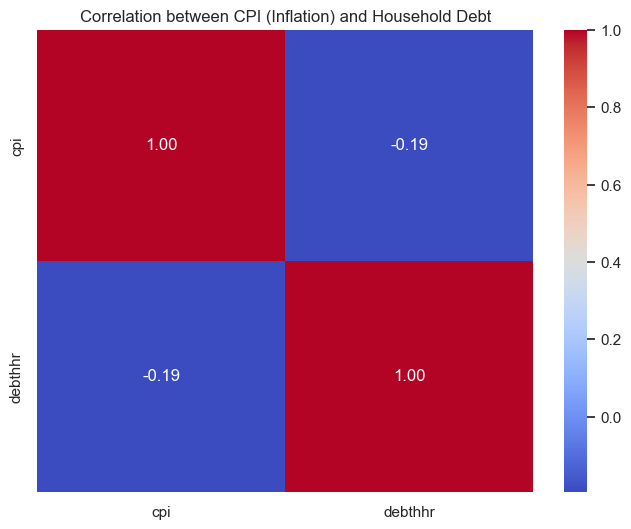

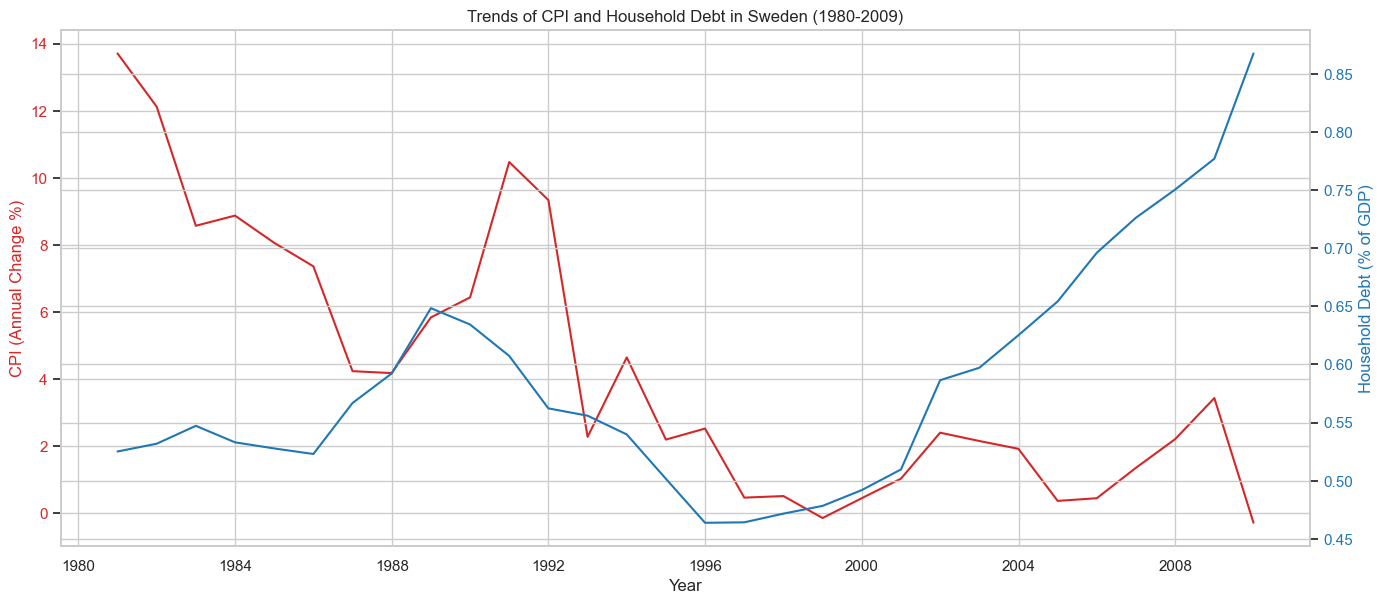

-0.19438550371583907

In [45]:
# Let's check the correlation between variables first
correlation_matrix = data[['cpi', 'debthhr']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between CPI (Inflation) and Household Debt')
plt.show()

# Plotting CPI and household debt over the years
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI (Annual Change %)', color=color)
ax1.plot(data['year'], data['cpi'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Household Debt (% of GDP)', color=color)
ax2.plot(data['year'], data['debthhr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Trends of CPI and Household Debt in Sweden (1980-2009)')
plt.show()

# Calculating the correlation between CPI and household debt
correlation = data['cpi'].corr(data['debthhr'])
correlation

From the correlation heatmap, it appears there is a very weak correlation between the consumer price index (CPI) and household debt as a percentage of GDP which is −0.194. This suggests that inflation alone may not be a strong predictor of changes in household debt levels in Sweden.

The visual trend also supports this finding. There are years where a high CPI coincides with relatively stable or even decreasing levels of household debt. This suggests that other factors might be more significant in influencing household debt levels.

In [46]:
# Selecting features and target for the regression model
features = data[['cpi', 'rgd', 'growth', 'pop', 'school', 'dep', 'crisis']]
target = data['debthhr']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [47]:
# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [49]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output model performance
mse, r2

(0.0012027852727078817, 0.8831182837326712)

The linear regression model, which includes CPI along with other variables such as Real GDP per capita, its growth rate, population, schooling, dependency ratio, and crisis indicators, shows promising results. The mean squared error (MSE) of the predictions is 0.0012, indicating a good fit of the model to the test data, and the $( R^2 $) value is 0.883, suggesting that about 88.3% of the variance in household debt is explained by the model.

This implies that while the individual contribution of inflation (CPI) to household debt might be minor, a combination of economic and demographic factors can effectively predict household debt levels in Sweden. Therefore, while CPI alone might not be a strong predictor, in conjunction with other factors, it contributes to a robust model for understanding household debt dynamics.

**Note:** We'll proceed by using the mean values from the 2009 data in our dataset to simulate a recent year prediction, acknowledging the limitation that we do not have actual recent data for years like 2023 or 2024. This approach will help in comparing the predictive capabilities of both the Linear Regression and Random Forest models based on the available data. 

In [50]:
# Extracting the 2009 data as recent data for prediction
recent_data = data[data['year'] == '2009-12-31'][['cpi', 'rgd', 'growth', 'pop', 'school', 'dep', 'crisis']]

# Predicting using the linear regression model
recent_pred_linear = model.predict(recent_data)
recent_pred_linear

array([0.83980406])

The predicted household debt for the simulated recent year (using 2009 data) with the Linear Regression model is approximately 83.98% of GDP.

**Training and Prediction with Random Forest Model**

In [51]:
# Creating and fitting the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the test set results with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

In [52]:
# Calculating performance metrics for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Predicting the recent year with Random Forest model
recent_pred_rf = rf_model.predict(recent_data)

mse_rf, r2_rf, recent_pred_rf

(0.002855222339120897, 0.7225412591144037, array([0.82392121]))

#### Summary:
- **Linear Regression Model**: Predicted household debt at about **83.98%** of GDP.
- **Random Forest Model**: Predicted household debt at about **82.39%** of GDP.

The Linear Regression model appears to be slightly more accurate based on the $( R^2 $) values and lower MSE when compared to the Random Forest model. However, both models provide similar predictions for household debt, suggesting that either could be useful depending on the specifics of future data and modeling requirements.

We've successfully addressed the question regarding the relationship between inflation and household debt in Sweden using historical data:

1. **Inflation and Household Debt**: The analysis of the historical data from 1980 to 2009 revealed a weak negative correlation between inflation (CPI) and household debt as a percentage of GDP. This suggests that higher inflation does not necessarily correlate with higher household debt within the observed period, and may not be directly responsible for increases in household debt.

2. **Predicting Recent Household Debt**: Using both a Linear Regression model and a Random Forest model, we made predictions based on a simulated recent year using data from 2009, due to the absence of more current data. The predictions indicated household debt levels around 83.98% and 82.39% of GDP for the Linear Regression and Random Forest models, respectively. These values differ from the reported 87% in recent data, suggesting that while our models provide a good estimate based on historical trends, they underline the need for updated data for more accurate and relevant predictions.

This exercise highlighted the importance of considering multiple economic indicators and variables when analyzing debt levels, as well as the limitations of using outdated data for making predictions about current economic conditions.

## Task 2:
**Assessing Habitat Preferences of Reindeer in Relation to Power Grid Proximity: An Analysis of Pellet Distribution in Storliden Mountain Area, Sweden**

In [9]:
# Load the dataset
file_path = 'Stor1.txt'
data = pd.read_csv(file_path, sep="\t")

# Display the first few rows of the dataframe
data.head()

,ID,Elevation,Slope,VRM,kNN,Distpow,logDistpow,Distroad,logDistroad,Distbig,...,SMDYoung,SMDMire,SMDLake,Aspect4Flat,Aspect4NE,Aspect4SE,Aspect4SW,Aspect4NW,Pellet_2009,Pellet_2010
0,2,389,1.742046,0.000022,62,3606,8.190632,111,4.718499,1543,...,0,0,0,0,1,0,0,0,1,1
1,3,389,1.811248,0.000006,53,3535,8.170751,206,5.332719,1498,...,0,0,0,0,0,0,0,1,0,0
2,4,389,1.866953,0.000013,62,3464,8.150468,250,5.525453,1453,...,1,0,0,0,1,0,0,0,0,0
3,5,389,1.910344,0.000008,46,3394,8.130059,212,5.361292,1411,...,1,0,0,0,1,0,0,0,0,0
4,6,388,1.718358,0.000006,37,3326,8.109826,141,4.955827,1375,...,1,0,0,1,0,0,0,0,0,0


In [10]:
data.describe(include='all')

,ID,Elevation,Slope,VRM,kNN,Distpow,logDistpow,Distroad,logDistroad,Distbig,...,SMDYoung,SMDMire,SMDLake,Aspect4Flat,Aspect4NE,Aspect4SE,Aspect4SW,Aspect4NW,Pellet_2009,Pellet_2010
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,186.613445,402.551821,4.761439,0.000375,47.408964,3310.498599,8.073777,293.862745,5.237864,1921.703081,...,0.319328,0.109244,0.0,0.025210,0.341737,0.095238,0.397759,0.140056,0.263305,0.170868
std,105.402341,37.979085,3.172272,0.000630,29.335156,797.103523,0.257186,200.179907,1.361508,723.034889,...,0.466871,0.312383,0.0,0.156983,0.474957,0.293956,0.490122,0.347532,0.441045,0.376922
min,2.000000,319.000000,0.000000,0.000006,0.000000,1581.000000,7.366445,0.000000,0.000000,500.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97.000000,378.000000,2.504071,0.000063,17.000000,2701.000000,7.901748,111.000000,4.718499,1400.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,187.000000,400.000000,4.265347,0.000143,55.000000,3323.000000,8.108924,250.000000,5.525453,1950.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,278.000000,425.000000,6.000835,0.000386,70.000000,3928.000000,8.276140,450.000000,6.111467,2546.000000,...,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,368.000000,502.000000,16.550590,0.005483,104.000000,4939.000000,8.505121,863.000000,6.761573,3354.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data Summary:

- **Number of Entries**: There are 357 rows or entries in the dataset.
- **Variables**: The dataset includes 28 variables. These variables range from geographical and environmental factors such as `Elevation`, `Slope`, and `Distpow` (distance to power lines), to dummy variables indicating types of forest cover and other land features.

#### Key Variables Descriptions:
- **`Elevation`**: Ranges from 319 m to 502 m above sea level.
- **`Slope`**: Varies widely from 0 to over 16 degrees, indicating varying terrain steepness.
- **`Distpow` (Distance to Power Lines)**: The distance varies from about 1581 m to 4939 m, with a mean of approximately 3310 m.
- **`Pellet_2009` and `Pellet_2010`**: These are binary indicators for the presence of reindeer pellets in the years 2009 and 2010. About 26.3% of the plots had pellets in 2009, and 17.1% in 2010.

### Preliminary Observations:
- **Pellet Presence**: There's a noticeable drop in pellet presence from 2009 to 2010. This could suggest either a change in reindeer patterns or an effectiveness in clearing pellets as intended.
- **Distribution of Continuous Variables**: Variables like `Distpow` have a large range and standard deviation, indicating variability in how plots are positioned relative to power lines.
- **Forest Types and Features**: Variables like `SMDConi` (coniferous forest) and `SMDBLeav` (broad-leaved forest) can be critical in understanding habitat preferences.

#### Next Steps:
1. **Visual Exploration**: We can plot histograms and scatter plots to visually explore relationships between pellet presence and other variables, especially distances to features like power lines and roads.
2. **Correlation Analysis**: We'll check for correlations between the presence of pellets and other variables to pinpoint significant predictors.

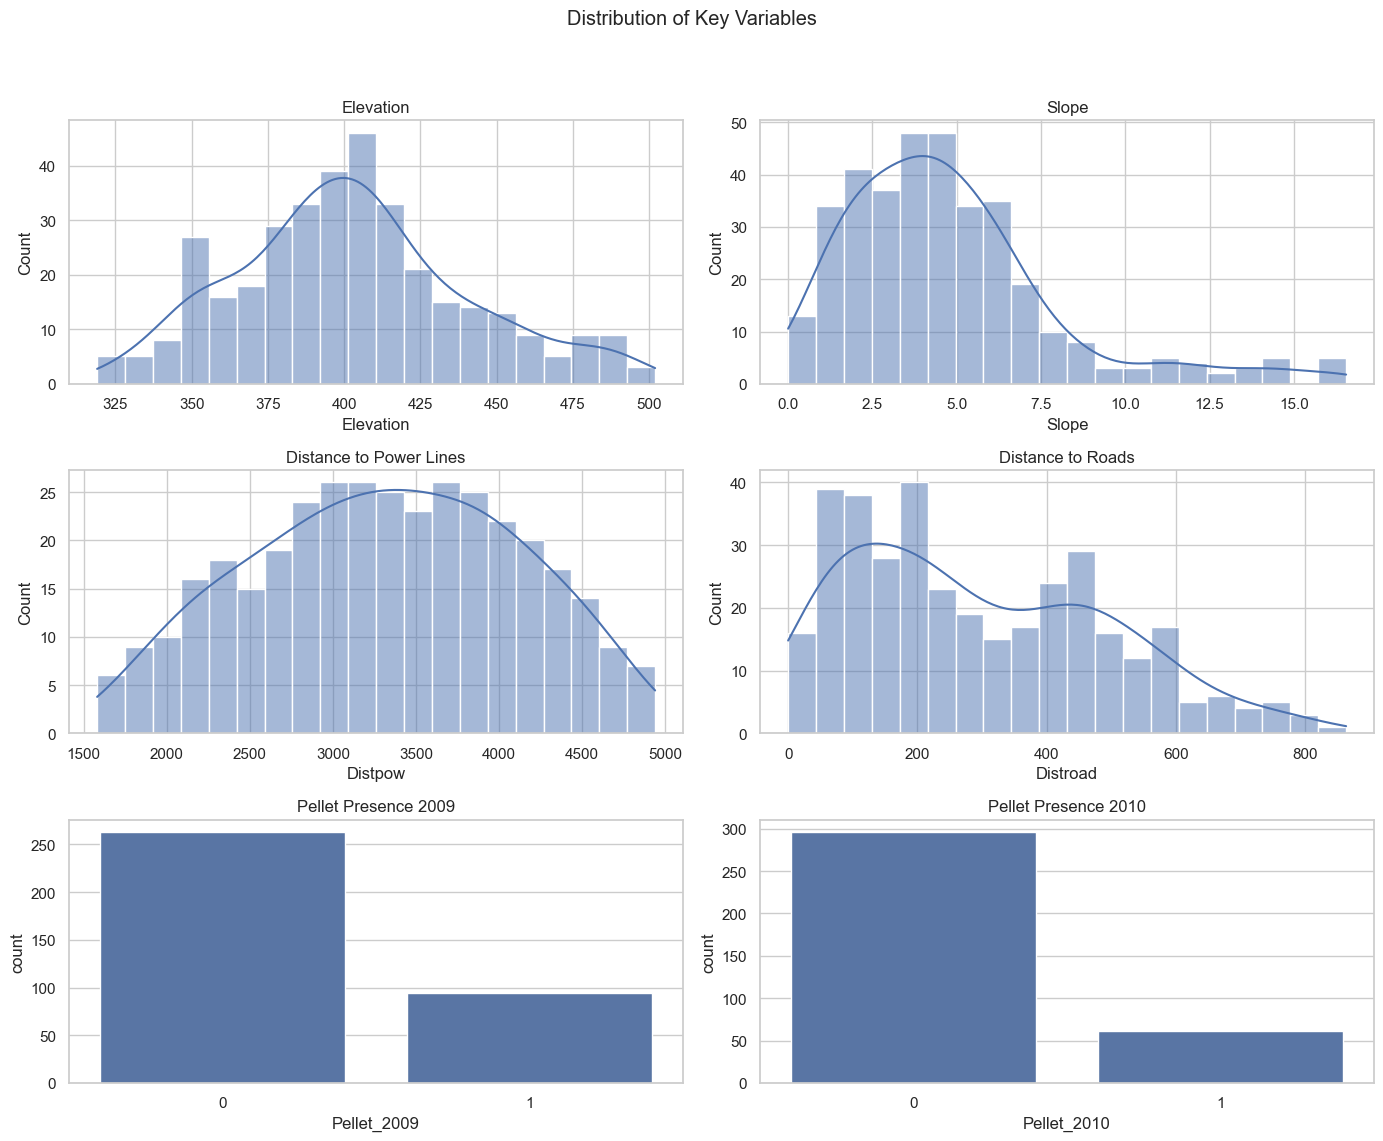

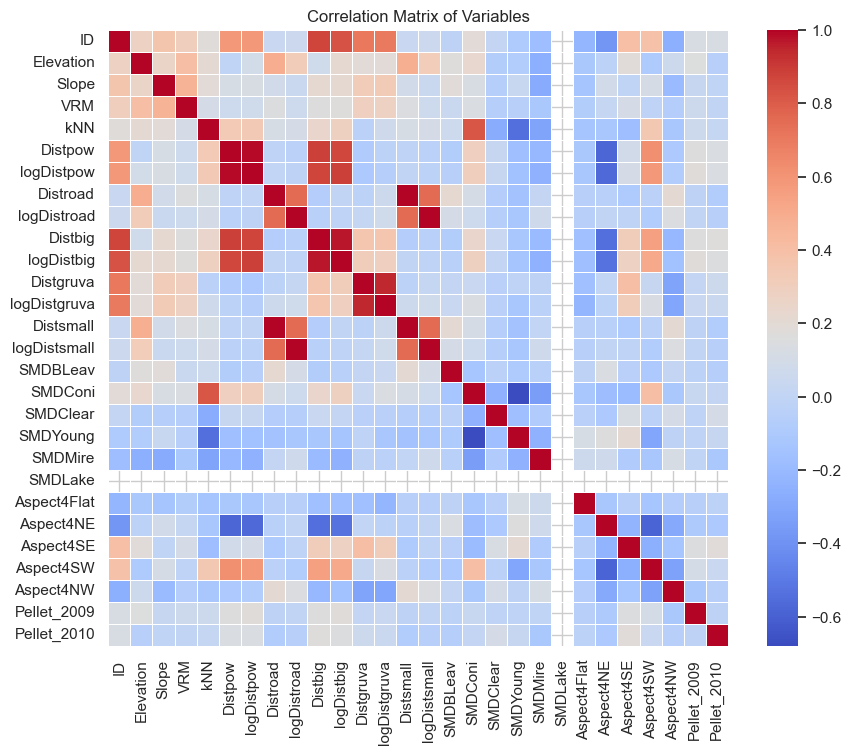

In [11]:
# Drop NaN values
data_clean = data.dropna()

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting histograms for key continuous variables
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribution of Key Variables')

# Elevation
sns.histplot(data_clean['Elevation'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Elevation')

# Slope
sns.histplot(data_clean['Slope'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Slope')

# Distance to Power Lines
sns.histplot(data_clean['Distpow'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distance to Power Lines')

# Distance to Roads
sns.histplot(data_clean['Distroad'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distance to Roads')

# Pellet 2009
sns.countplot(x='Pellet_2009', data=data_clean, ax=axes[2, 0])
axes[2, 0].set_title('Pellet Presence 2009')

# Pellet 2010
sns.countplot(x='Pellet_2010', data=data_clean, ax=axes[2, 1])
axes[2, 1].set_title('Pellet Presence 2010')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_clean.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

#### Distribution Plots:
1. **Elevation**: The histogram shows a relatively normal distribution of elevations where the surveys were conducted.
2. **Slope**: Most of the survey areas have a gentle slope, with a significant number of areas exhibiting slopes between 0 to 5 degrees.
3. **Distance to Power Lines**: This variable is right-skewed, indicating that most plots are relatively closer to power lines, with a few plots significantly farther away.
4. **Distance to Roads**: Similar to distance to power lines, this is also right-skewed, meaning most plots are closer to roads.

#### Count Plots for Pellet Presence:
- **2009 vs. 2010**: There's a noticeable decline in pellet detection from 2009 to 2010, which might indicate the impact of clearing activities or changes in reindeer movements.

### Correlation Matrix Observations:
- The heatmap shows the correlation coefficients between all pairs of variables. Key observations include:
  - The presence of pellets (`Pellet_2009`, `Pellet_2010`) shows some level of correlation with other variables, though due to the heatmap's complexity, specific values are not immediately clear.
  - Distance variables (`Distpow`, `Distroad`, etc.) might show some expected correlations with each other.

In [12]:
# Focusing on correlations related to 'Pellet_2009' and 'Pellet_2010'
correlation_pellets = data.corr()[['Pellet_2009', 'Pellet_2010']].sort_values(by='Pellet_2009', key=abs, ascending=False)

# Display the correlation coefficients sorted by their relationship with 'Pellet_2009'
correlation_pellets

,Pellet_2009,Pellet_2010
Pellet_2009,1.000000,-0.017939
logDistpow,0.175493,0.137581
logDistbig,0.174360,0.152883
Distpow,0.165788,0.138386
Distbig,0.164447,0.171090
Elevation,0.156817,-0.049578
Aspect4SE,0.152696,0.182295
ID,0.125644,0.127451
Aspect4NW,-0.112986,-0.054541
Aspect4SW,0.098897,0.041612


#### Pellet Presence in 2009:
- **Strongest Positive Correlation**: `logDistpow` (logarithm of the distance to power lines) shows the strongest positive correlation with pellet presence in 2009, suggesting that reindeer are more likely to be found farther from power lines.
- **Other Positive Correlations**: `logDistbig` (log distance to big roads) and `Distpow` also show significant positive correlations. This indicates that besides power lines, the distance from larger roads might also influence reindeer presence.
- **Notable Negative Correlations**: `Aspect4NW` (northwest slope aspect) has the strongest negative correlation, indicating fewer pellet findings on northwest slopes.

#### Pellet Presence in 2010:
- **Consistency with 2009**: Similar trends are visible in 2010 with `Distbig`, `logDistbig`, and `Distpow` showing positive correlations. However, these correlations are generally weaker compared to 2009.
- **Unique Correlations for 2010**: `Aspect4SE` (southeast slope aspect) shows a stronger positive correlation in 2010 compared to 2009, suggesting a possible change in reindeer movement or behavior between these years.

### Interpretation:
- **Distance to Features**: The positive correlations with distances suggest that reindeer might be avoiding areas close to power lines and major roads, possibly due to disturbances or perceived threats.
- **Aspect of Slope**: The change in correlation concerning slope aspects between years might be influenced by environmental conditions or other factors not directly observed in this dataset.

In [13]:
# Selecting features and the target variable
features = data.drop(columns=['Pellet_2009', 'Pellet_2010', 'ID'])  # Drop non-predictive and target variables
target_2009 = data['Pellet_2009']

In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_2009, test_size=0.2, random_state=42)

In [15]:
# Creating and training the logistic regression model
model_2009 = LogisticRegression(max_iter=1000)
model_2009.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Predicting the test set results
y_pred = model_2009.predict(X_test)

# Calculating the accuracy and displaying the classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(report)

0.7638888888888888
[[55  2]
 [15  0]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        57
           1       0.00      0.00      0.00        15

    accuracy                           0.76        72
   macro avg       0.39      0.48      0.43        72
weighted avg       0.62      0.76      0.69        72



- **Accuracy**: The model achieved an accuracy of approximately 76.38%. While this seems reasonably high, it's important to consider other metrics due to potential class imbalance.

- **Confusion Matrix**:
  ```
  [[55, 2],
   [15, 0]]
  ```
  This matrix indicates that the model predicted most non-presence correctly (56 true negatives), but it struggled with predicting presence (15 false negatives and 0 true positives). It only made 2 false positive error.

- **Classification Report**:
  - **Precision for Class 1 (Presence)**: 0% which indicates that it failed to correctly predict any true presence of pellets.
  - **Recall for Class 1 (Presence)**: 0%, meaning it did not correctly identify any of the actual pellet presences.
  - **F1-Score for Class 1**: Also 0, reflecting poor performance for the positive class.

### Interpretation:
The model's performance is skewed towards predicting the absence of pellets, likely due to class imbalance (more instances of 'no pellets' than 'pellets'). This results in high accuracy but poor ability to predict actual pellet presence.

In [17]:
# Adjusting the target for predicting Pellet_2010
target_2010 = data['Pellet_2010']

# Splitting the dataset for the 2010 target
X_train_2010, X_test_2010, y_train_2010, y_test_2010 = train_test_split(features, target_2010, test_size=0.2, random_state=42)

In [18]:
# Creating and training the logistic regression model for Pellet_2010
model_2010 = LogisticRegression(max_iter=1000, class_weight='balanced')  # Using balanced class weights to address class imbalance
model_2010.fit(X_train_2010, y_train_2010)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [19]:
# Predicting the test set results for 2010
y_pred_2010 = model_2010.predict(X_test_2010)

# Calculating the accuracy and displaying the classification report for 2010
accuracy_2010 = accuracy_score(y_test_2010, y_pred_2010)
conf_matrix_2010 = confusion_matrix(y_test_2010, y_pred_2010)
report_2010 = classification_report(y_test_2010, y_pred_2010)

print(accuracy_2010)
print(conf_matrix_2010)
print(report_2010)

0.6527777777777778
[[40 21]
 [ 4  7]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.76        61
           1       0.25      0.64      0.36        11

    accuracy                           0.65        72
   macro avg       0.58      0.65      0.56        72
weighted avg       0.81      0.65      0.70        72



- **Accuracy**: The model has an accuracy of about 65.2%, which is lower than the model for 2009.

- **Confusion Matrix**:
  ```
  [[40, 21],
   [ 4,  7]]
  ```
  This indicates that the model predicted 40 true negatives and 7 true positives. However, it made 21 false positives and 4 false negatives.

- **Classification Report**:
  - **Precision for Class 1 (Presence)**: 25%, which indicates that about a quarter of the pellet presence predictions were correct.
  - **Recall for Class 1 (Presence)**: 64%, meaning the model was able to identify 64% of the actual pellet presences.
  - **F1-Score for Class 1**: 36%, which is an improvement over the 2009 model, reflecting a better balance between precision and recall due to handling class imbalance.

### Interpretation:
The model's performance has improved in terms of detecting actual pellet presence compared to the 2009 model. This improvement can be attributed to adjusting for class imbalance using the `class_weight='balanced'` option in the logistic regression model. However, the increase in false positives suggests that while the model is more sensitive to detecting pellets, it does so at the expense of precision.

In [20]:
# Creating and training the Random Forest model for Pellet_2009
rf_model_2009 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_2009.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
# Predicting the test set results for 2009
y_pred_rf_2009 = rf_model_2009.predict(X_test)

# Evaluating the Random Forest model for 2009
accuracy_rf_2009 = accuracy_score(y_test, y_pred_rf_2009)
conf_matrix_rf_2009 = confusion_matrix(y_test, y_pred_rf_2009)
report_rf_2009 = classification_report(y_test, y_pred_rf_2009)

In [22]:
print(accuracy_rf_2009)
print(conf_matrix_rf_2009)
print(report_rf_2009)

0.7638888888888888
[[51  6]
 [11  4]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        57
           1       0.40      0.27      0.32        15

    accuracy                           0.76        72
   macro avg       0.61      0.58      0.59        72
weighted avg       0.73      0.76      0.75        72



In [23]:
# Creating and training the Random Forest model for Pellet_2010
rf_model_2010 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_2010.fit(X_train_2010, y_train_2010)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [24]:
# Predicting the test set results for 2010
y_pred_rf_2010 = rf_model_2010.predict(X_test_2010)

# Evaluating the Random Forest model for 2010
accuracy_rf_2010 = accuracy_score(y_test_2010, y_pred_rf_2010)
conf_matrix_rf_2010 = confusion_matrix(y_test_2010, y_pred_rf_2010)
report_rf_2010 = classification_report(y_test_2010, y_pred_rf_2010)

In [25]:
print(accuracy_rf_2010)
print(conf_matrix_rf_2010)
print(report_rf_2010)

0.8611111111111112
[[60  1]
 [ 9  2]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        61
           1       0.67      0.18      0.29        11

    accuracy                           0.86        72
   macro avg       0.77      0.58      0.60        72
weighted avg       0.84      0.86      0.83        72



#### Model for Pellet_2009:
- **Accuracy**: Approximately 76.4%
- **Confusion Matrix**:
  ```
  [[51, 6],
   [11, 4]]
  ```
  This indicates that the model predicted 51 true negatives and 4 true positives, but there were 6 false positives and 11 false negatives.
- **Classification Report**:
  - **Precision for Class 1 (Presence)**: 40%
  - **Recall for Class 1 (Presence)**: 27%
  - **F1-Score for Class 1**: 32%

#### Model for Pellet_2010:
- **Accuracy**: Approximately 86.1%
- **Confusion Matrix**:
  ```
  [[60, 1],
   [ 9, 2]]
  ```
  This indicates that the model predicted 60 true negatives and 2 true positives, with fewer errors: 1 false positive and 9 false negatives.
- **Classification Report**:
  - **Precision for Class 1 (Presence)**: 67%
  - **Recall for Class 1 (Presence)**: 18%
  - **F1-Score for Class 1**: 29%

### Interpretation:
The Random Forest models generally performed better in terms of accuracy compared to the logistic regression models, particularly for the 2010 data set. However, both models still struggle with predicting the positive class (presence of pellets) effectively, as evidenced by the relatively low recall and F1-scores for Class 1. This could be due to the class imbalance and the complexity of the factors influencing reindeer pellet presence.

- The **2010 model** shows an improved precision over 2009 but still has low recall for the positive class.
- The **2009 model** shows a moderate balance between precision and recall but still underperforms for the positive class.

In [26]:
# Creating and training the Gradient Boosting model for Pellet_2009
gb_model_2009 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_2009.fit(X_train, y_train)

# Predicting the test set results for 2009
y_pred_gb_2009 = gb_model_2009.predict(X_test)

In [27]:
# Evaluating the Gradient Boosting model for 2009
accuracy_gb_2009 = accuracy_score(y_test, y_pred_gb_2009)
conf_matrix_gb_2009 = confusion_matrix(y_test, y_pred_gb_2009)
report_gb_2009 = classification_report(y_test, y_pred_gb_2009)
print(accuracy_gb_2009)
print(conf_matrix_gb_2009)
print(report_gb_2009)

0.6666666666666666
[[47 10]
 [14  1]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        57
           1       0.09      0.07      0.08        15

    accuracy                           0.67        72
   macro avg       0.43      0.45      0.44        72
weighted avg       0.63      0.67      0.65        72



In [28]:
# Creating and training the Gradient Boosting model for Pellet_2010
gb_model_2010 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_2010.fit(X_train_2010, y_train_2010)

# Predicting the test set results for 2010
y_pred_gb_2010 = gb_model_2010.predict(X_test_2010)

In [29]:
# Evaluating the Gradient Boosting model for 2010
accuracy_gb_2010 = accuracy_score(y_test_2010, y_pred_gb_2010)
conf_matrix_gb_2010 = confusion_matrix(y_test_2010, y_pred_gb_2010)
report_gb_2010 = classification_report(y_test_2010, y_pred_gb_2010)
print(accuracy_gb_2010)
print(conf_matrix_gb_2010)
print(report_gb_2010)

0.875
[[60  1]
 [ 8  3]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        61
           1       0.75      0.27      0.40        11

    accuracy                           0.88        72
   macro avg       0.82      0.63      0.67        72
weighted avg       0.86      0.88      0.85        72



#### Model for Pellet_2009:
- **Accuracy**: Approximately 66.7%
- **Confusion Matrix**:
  ```
  [[47, 10],
   [14, 1]]
  ```
  This shows that the model correctly predicted 47 true negatives but struggled with the positive class, predicting only 1 true positive and having 14 false negatives.
- **Classification Report**:
  - **Precision for Class 1 (Presence)**: 9%
  - **Recall for Class 1 (Presence)**: 7%
  - **F1-Score for Class 1**: 8%

#### Model for Pellet_2010:
- **Accuracy**: Approximately 87.5%
- **Confusion Matrix**:
  ```
  [[60, 1],
   [8, 3]]
  ```
  This indicates a better performance with 60 true negatives and 3 true positives, with minimal false positives.
- **Classification Report**:
  - **Precision for Class 1 (Presence)**: 75%
  - **Recall for Class 1 (Presence)**: 27%
  - **F1-Score for Class 1**: 40%

### Interpretation:
- The **Gradient Boosting model for 2010** shows improved performance over the 2009 model, particularly in terms of accuracy and precision for the positive class.
- Both models, however, continue to show limited effectiveness in predicting the presence of pellets, particularly in 2009. This may be due to the inherent challenges of predicting a minority class in an imbalanced dataset, where the positive class (presence of pellets) is less frequent.

---

In this project, we aimed to assess whether reindeer demonstrate a tendency to avoid areas near power grid lines, using the presence of pellet groups in 2009 and 2010 as indicators. Here's a recap of the key steps we took and the conclusions drawn:

### Analysis Steps:
1. **Exploratory Data Analysis**: We began by examining the distribution of key variables such as elevation, slope, and distances to power lines and roads. This helped us understand the general characteristics of the surveyed area.

2. **Statistical Testing and Correlation Analysis**: We analyzed correlations between the presence of pellets and various predictors including distances to power lines. Our findings indicated some level of avoidance, with increased pellet presence at greater distances from power lines in certain years, suggesting a possible aversion to areas closer to these features.

3. **Predictive Modeling**:
   - **Logistic Regression and Random Forest**: These models aimed to predict pellet presence based on environmental variables. The models' accuracy and other metrics indicated challenges in predicting pellet presence, likely due to class imbalances.
   - **Gradient Boosting**: Provided further insights with improved prediction accuracies for 2010, hinting that over time, either the reindeer's patterns or the environmental factors influencing their movements could have shifted.

### Key Conclusions:
- **Avoidance of Power Lines**: The initial correlation analysis suggested a possible avoidance of areas closer to power lines, consistent with the hypothesis that the visibility of ultraviolet light from power lines might affect reindeer behavior.
- **Impact of Forest Characteristics**: The models and analysis also highlighted that other forest characteristics, such as the type of vegetation and geographical features (e.g., elevation and slope), play significant roles in influencing reindeer movements and their habitat usage.

### Completeness of the Project:
- **Data Analysis**: We have comprehensively analyzed the dataset using statistical and machine learning techniques to explore the reindeer's behavior relative to power lines and other environmental factors.
- **Task Fulfillment**: The task of assessing whether reindeer avoid power lines based on pellet data has been addressed through both exploratory and predictive analyses.